In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [ ]:
Question 2)
Forecast the airline passengers data set.

In [2]:
#Read the data set
air=pd.read_excel("Airlines+Data.xlsx")
air.head(6)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135


# EDA

In [3]:
air.columns

Index(['Month', 'Passengers'], dtype='object')

In [4]:
air.shape

(96, 2)

In [5]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
air.tail(3)

,Month,Passengers
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [8]:
air.sample()

,Month,Passengers
61,2000-02-01,188


In [9]:
air.isna().sum()

Month         0
Passengers    0
dtype: int64

# Data Visualization

<AxesSubplot:>

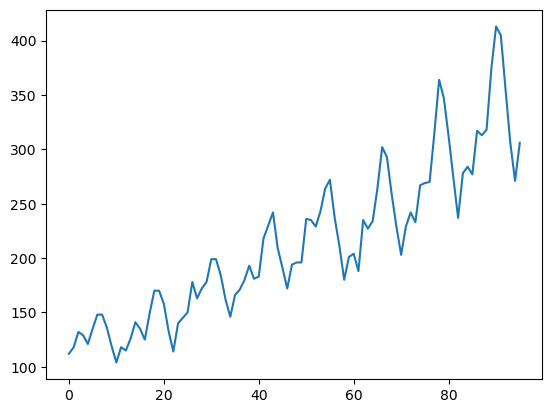

In [10]:
air.Passengers.plot()

In [11]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Passengers'>

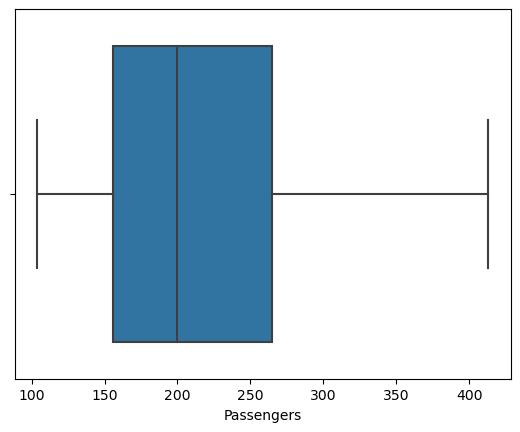

In [12]:
sns.boxplot(air.Passengers)

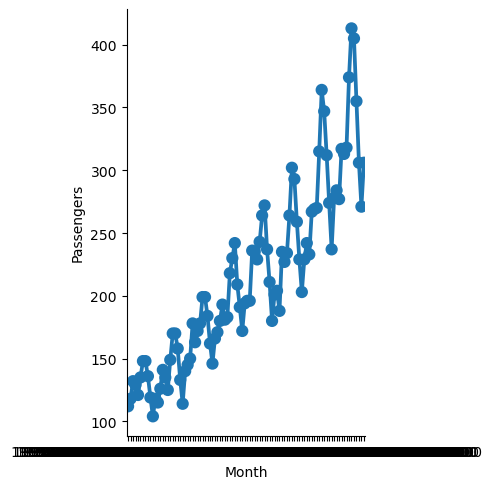

In [13]:
sns.factorplot("Month","Passengers",data=air)

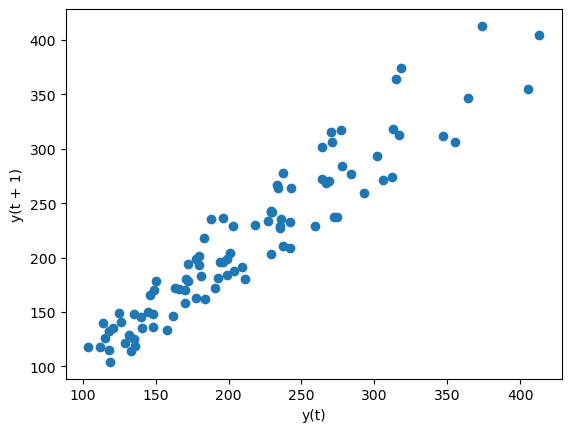

In [14]:
from pandas.plotting import lag_plot
lag_plot(air['Passengers'])
plt.show()

# Moving average method

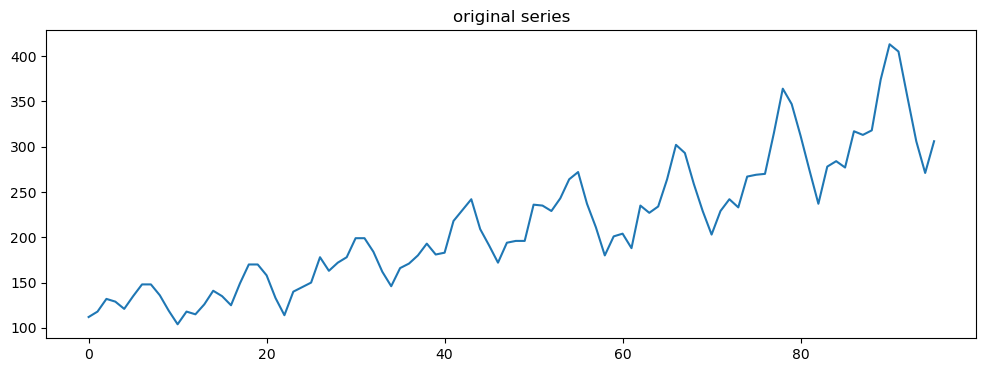

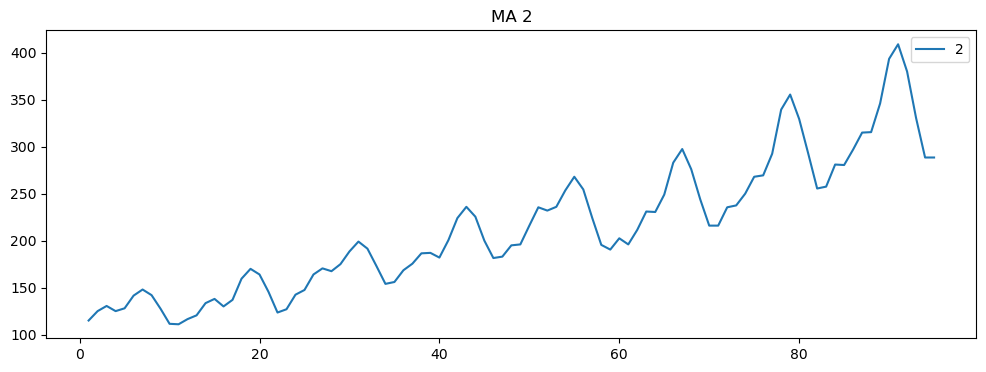

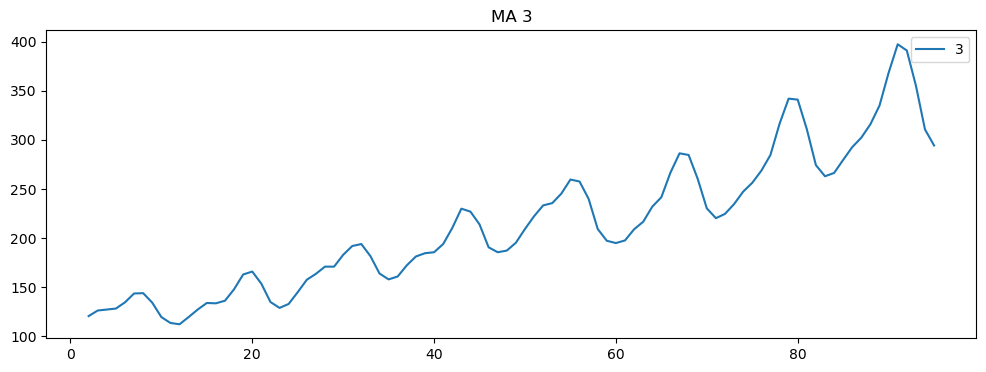

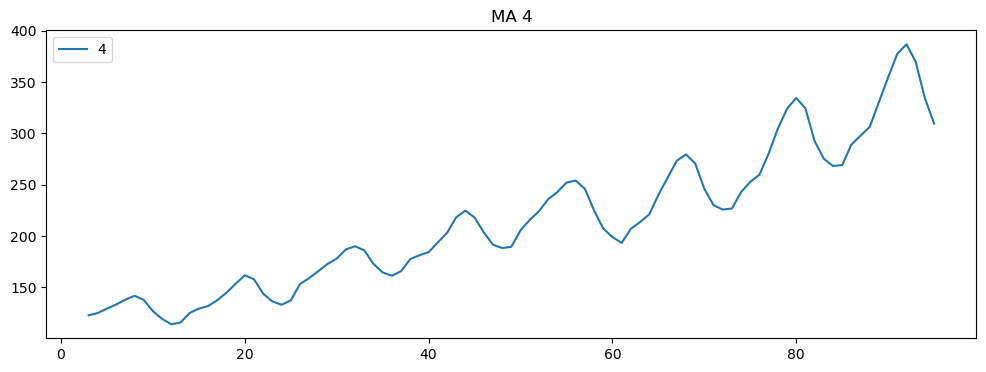

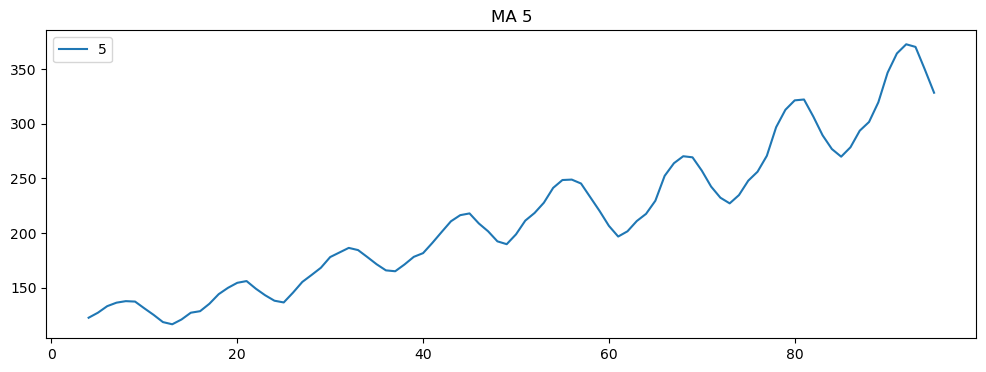

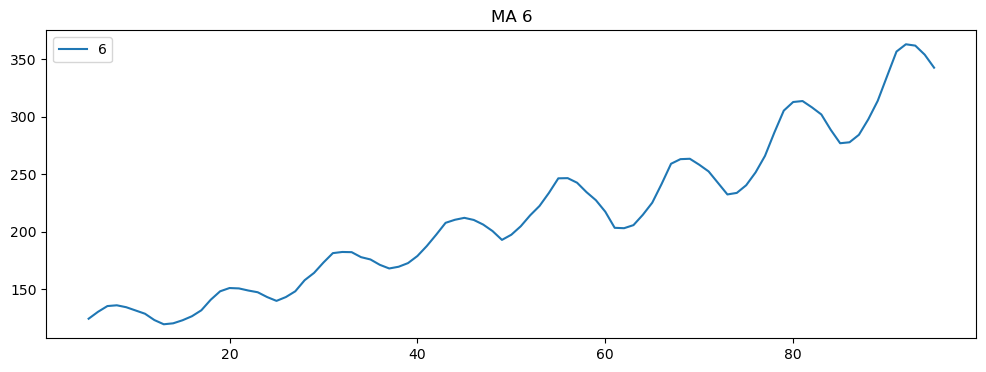

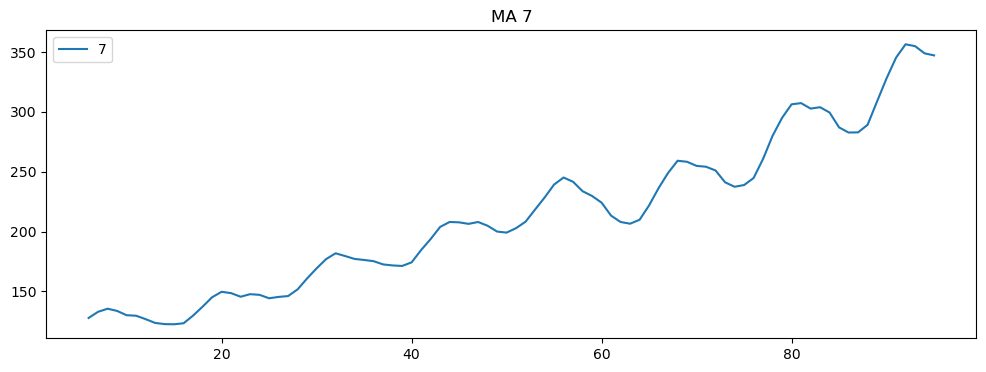

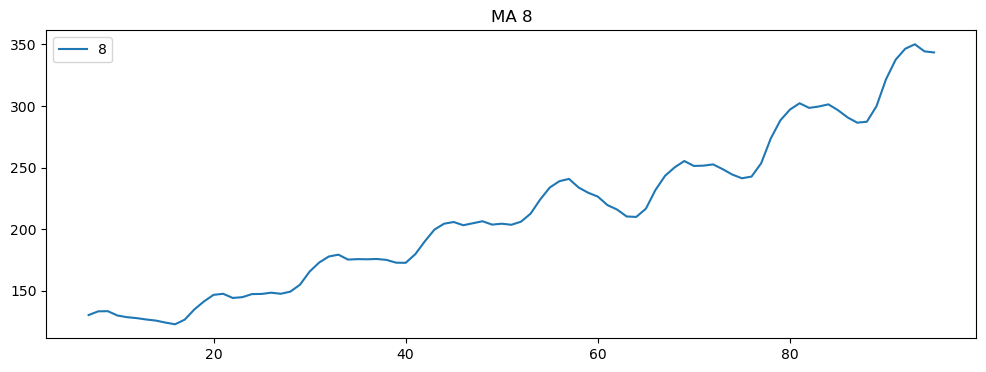

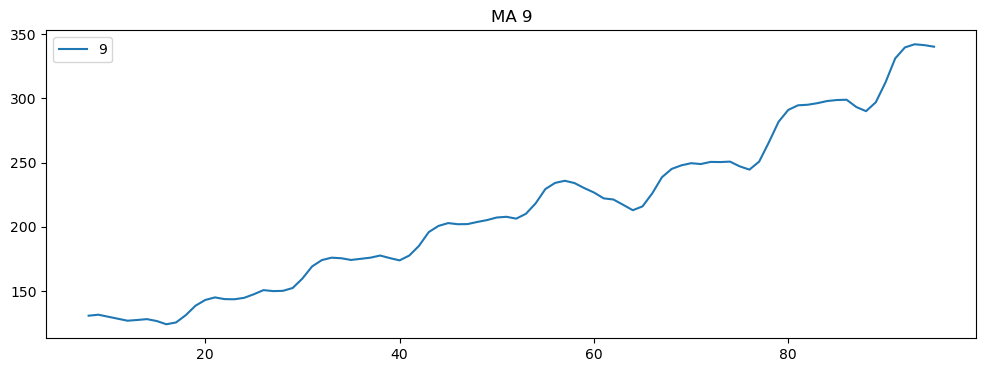

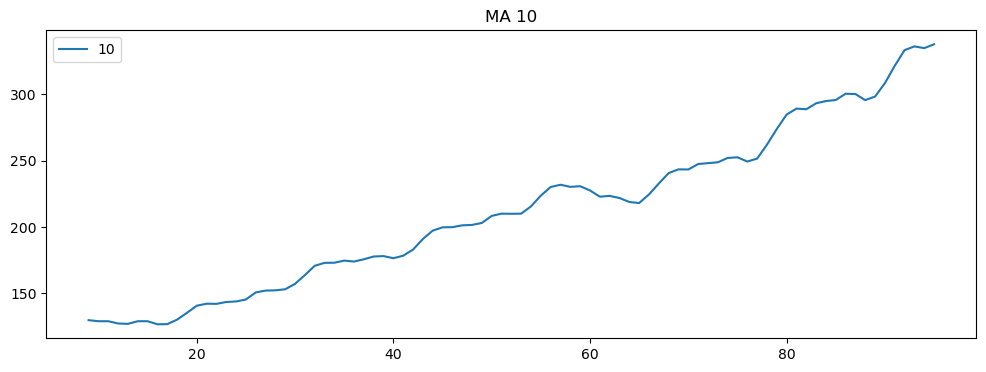

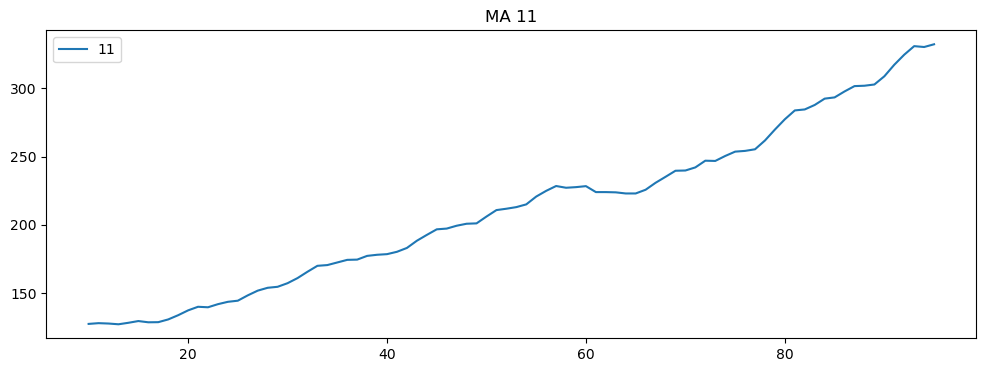

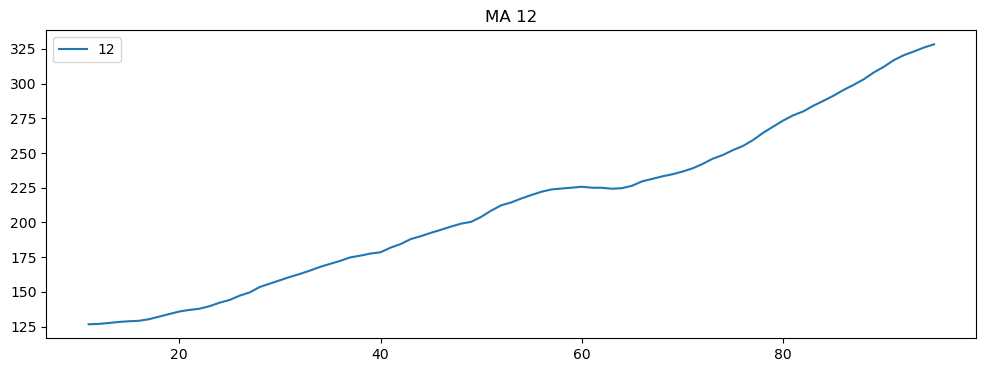

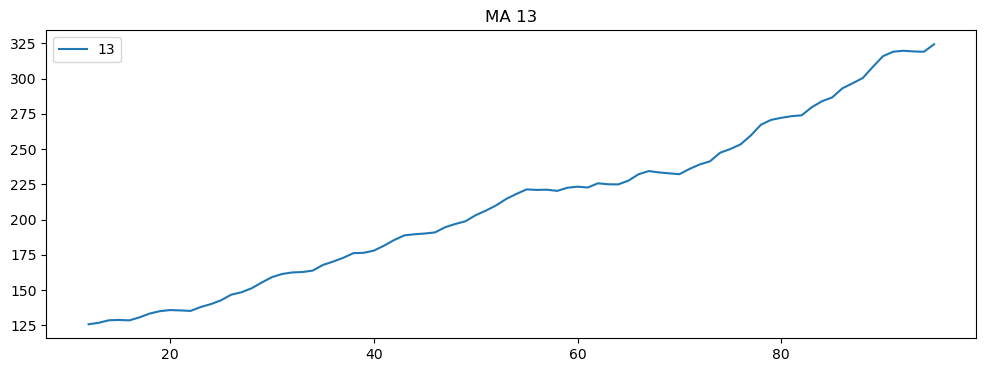

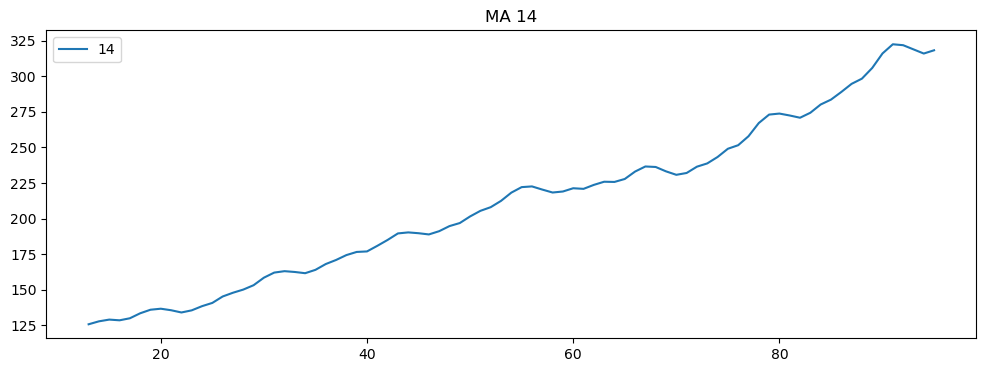

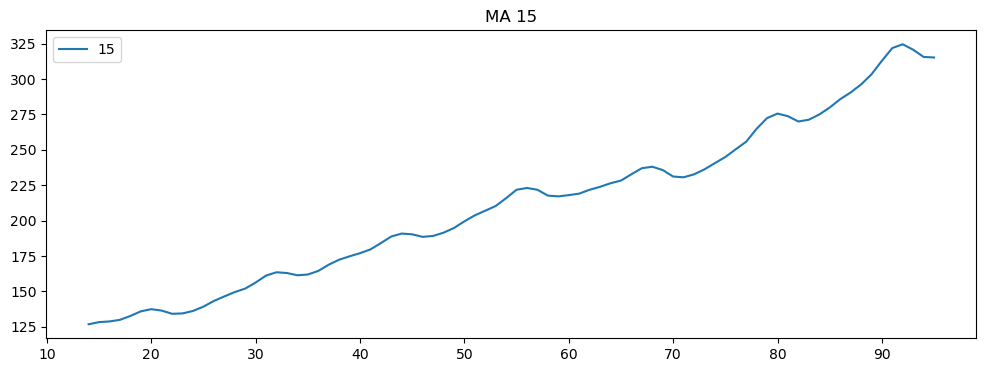

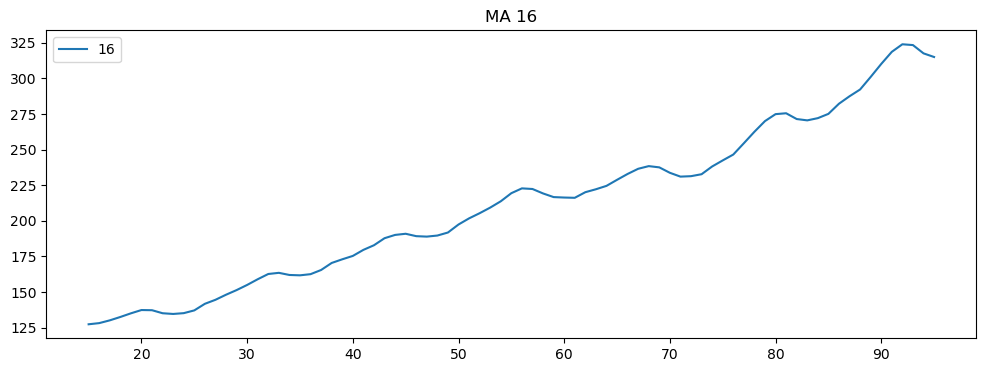

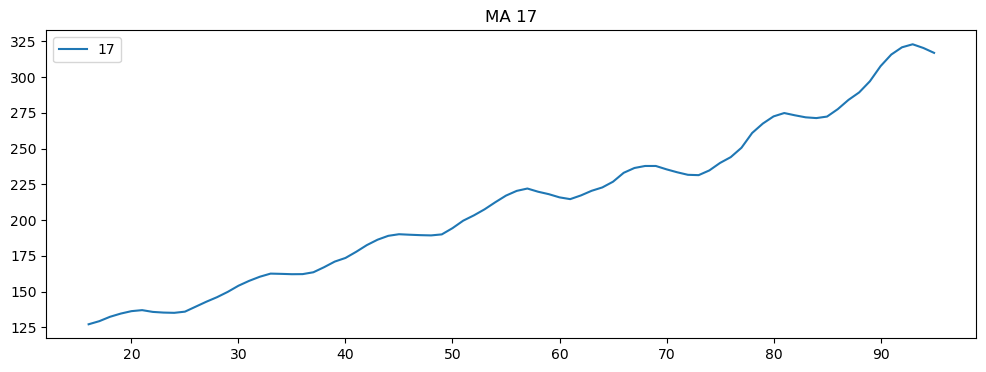

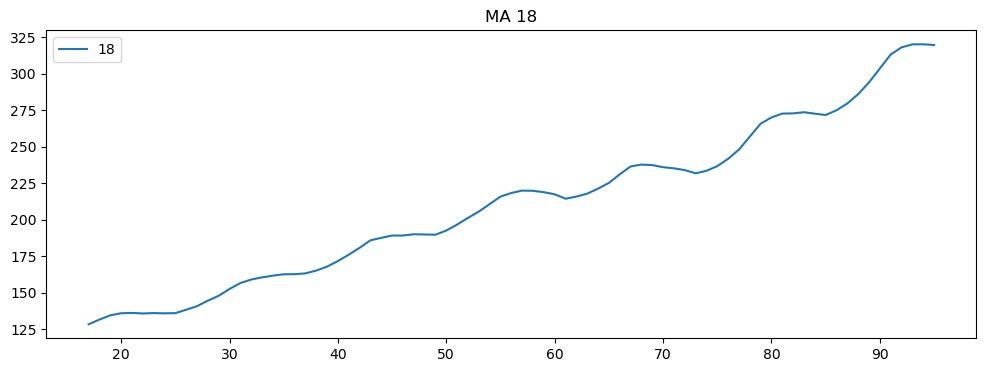

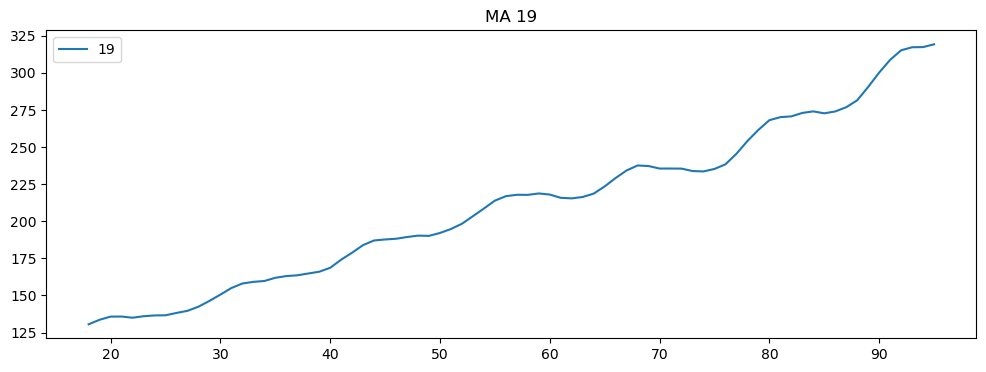

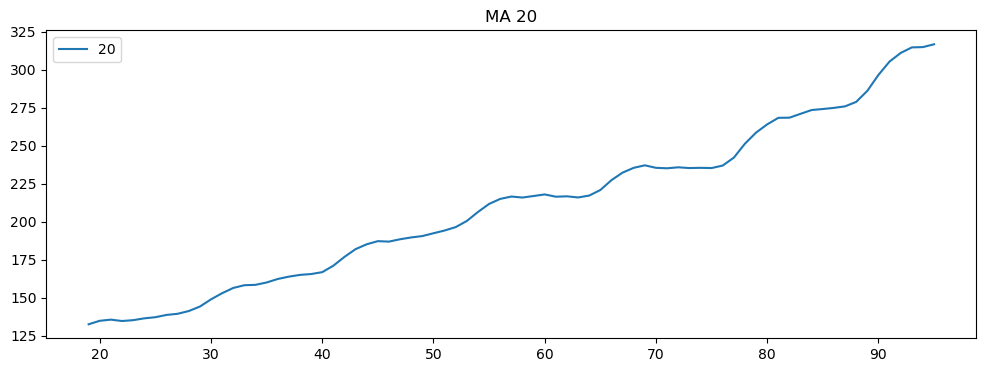

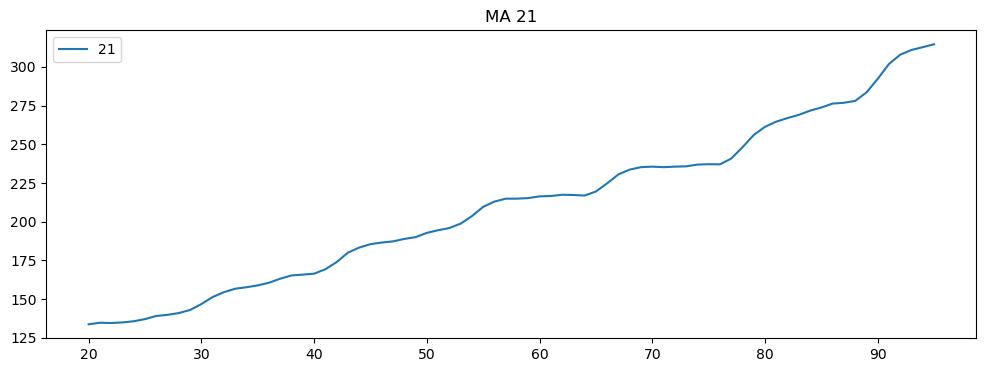

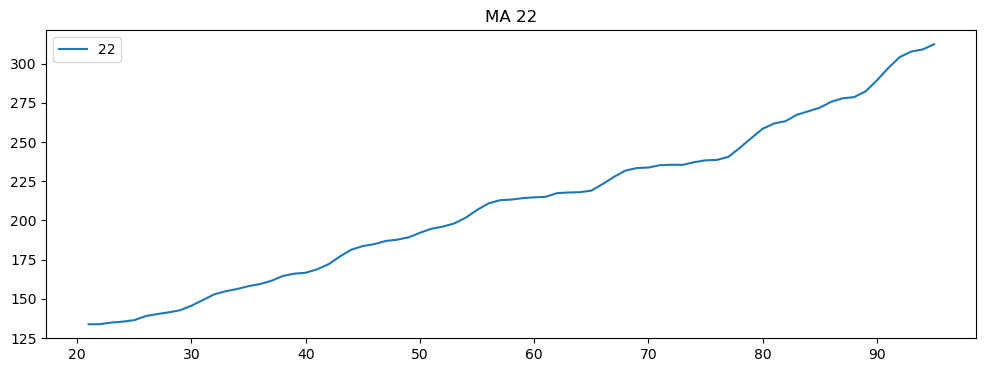

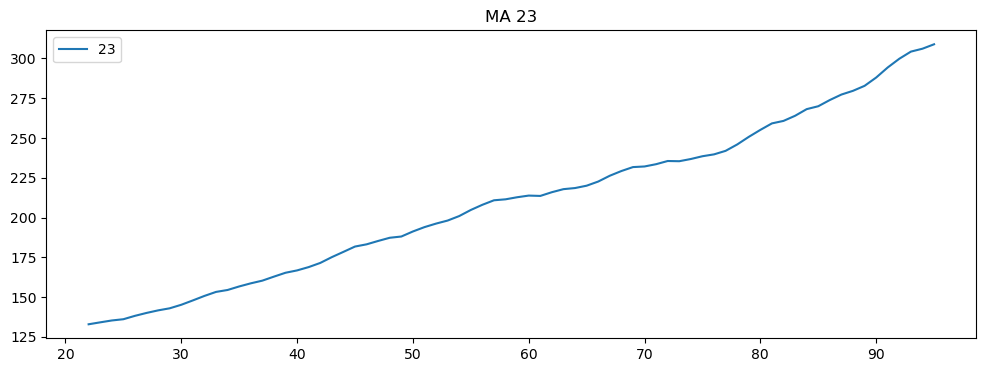

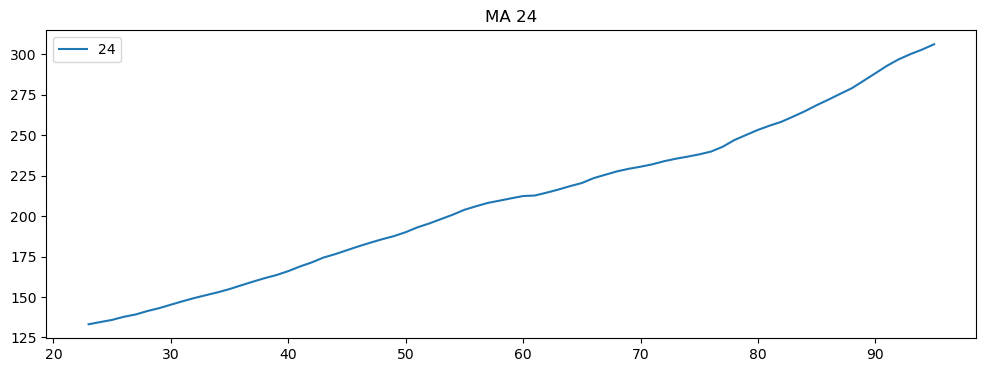

In [15]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    air["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot

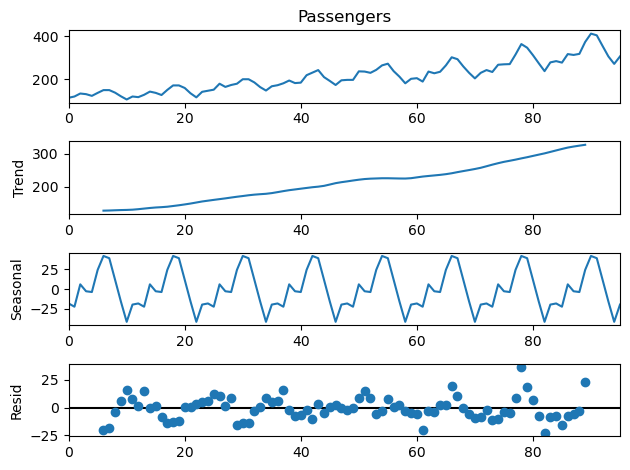

In [18]:
#from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

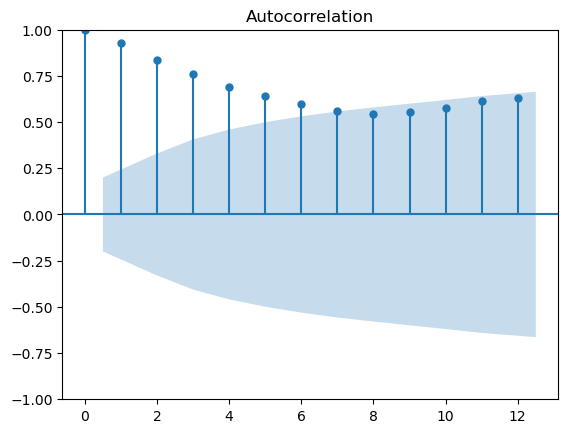

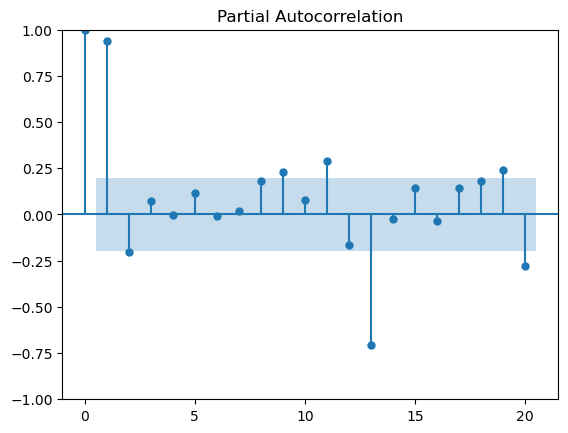

In [19]:
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers)
plt.show()

# Model building

In [20]:
Train=air.head(70)
Test=air.tail(26)

# Evaluation of metric MAPE

In [21]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple exponential method

In [22]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = MAPE(Test.Passengers, pred_ses)
rmse_ses_model

22.076256764951356

In [23]:
pred_ses

70    229.0
71    229.0
72    229.0
73    229.0
74    229.0
75    229.0
76    229.0
77    229.0
78    229.0
79    229.0
80    229.0
81    229.0
82    229.0
83    229.0
84    229.0
85    229.0
86    229.0
87    229.0
88    229.0
89    229.0
90    229.0
91    229.0
92    229.0
93    229.0
94    229.0
95    229.0
dtype: float64

In [24]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Passengers) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 27.842535367253085
smoothing_level  0.1473684210526316 --> MAPE Error 24.800181693031366
smoothing_level  0.19473684210526315 --> MAPE Error 23.2302505880212
smoothing_level  0.24210526315789474 --> MAPE Error 22.294041376371293
smoothing_level  0.2894736842105263 --> MAPE Error 21.797065960584288
smoothing_level  0.33684210526315794 --> MAPE Error 21.64567052824282
smoothing_level  0.38421052631578945 --> MAPE Error 21.771750561386625
smoothing_level  0.43157894736842106 --> MAPE Error 22.116978311162356
smoothing_level  0.4789473684210527 --> MAPE Error 22.63025172453253
smoothing_level  0.5263157894736842 --> MAPE Error 23.267492951069297
smoothing_level  0.5736842105263158 --> MAPE Error 23.991358066302617
smoothing_level  0.6210526315789474 --> MAPE Error 24.77058177028232
smoothing_level  0.6684210526315789 --> MAPE Error 25.579153432629578
smoothing_level  0.7157894736842105 --> MAPE Error 26.454095177106492
smoothing_level  0.7631578947368421

# Holt Method

In [25]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 


63.93424711792193

In [26]:
import numpy as np
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        
        score=MAPE(pred_hw,Test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 12.088464362003615
smoothing_level  0.1  smoothing_slope 0.2 --> MAPE Error 12.187623922343942
smoothing_level  0.1  smoothing_slope 0.30000000000000004 --> MAPE Error 11.352343184343798
smoothing_level  0.1  smoothing_slope 0.4 --> MAPE Error 11.447368170352132
smoothing_level  0.1  smoothing_slope 0.5 --> MAPE Error 13.00552763171463
smoothing_level  0.1  smoothing_slope 0.6 --> MAPE Error 16.72009341614201
smoothing_level  0.1  smoothing_slope 0.7000000000000001 --> MAPE Error 22.54029999776428
smoothing_level  0.1  smoothing_slope 0.8 --> MAPE Error 27.975828331556972
smoothing_level  0.1  smoothing_slope 0.9 --> MAPE Error 32.584122129670135
smoothing_level  0.2  smoothing_slope 0.1 --> MAPE Error 11.820859835766262
smoothing_level  0.2  smoothing_slope 0.2 --> MAPE Error 12.200418105722058
smoothing_level  0.2  smoothing_slope 0.30000000000000004 --> MAPE Error 15.459798153616159
smoothing_level  0.2  smoothing_slope 0.4 --

smoothing_level  0.7000000000000001  smoothing_slope 0.8 --> MAPE Error 438.7969665579151
smoothing_level  0.7000000000000001  smoothing_slope 0.9 --> MAPE Error 420.80002237399736
smoothing_level  0.8  smoothing_slope 0.1 --> MAPE Error 27.61073345493042
smoothing_level  0.8  smoothing_slope 0.2 --> MAPE Error 63.93424711792193
smoothing_level  0.8  smoothing_slope 0.30000000000000004 --> MAPE Error 394.84039757337234
smoothing_level  0.8  smoothing_slope 0.4 --> MAPE Error 14072.505204991168
smoothing_level  0.8  smoothing_slope 0.5 --> MAPE Error 541.7364502404583
smoothing_level  0.8  smoothing_slope 0.6 --> MAPE Error 2777.726870270822
smoothing_level  0.8  smoothing_slope 0.7000000000000001 --> MAPE Error 386.01200840770605
smoothing_level  0.8  smoothing_slope 0.8 --> MAPE Error 405.36635498713923
smoothing_level  0.8  smoothing_slope 0.9 --> MAPE Error 330.3654013451906
smoothing_level  0.9  smoothing_slope 0.1 --> MAPE Error 33.62167521968702
smoothing_level  0.9  smoothing_sl

In [27]:
new=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
new.sort_values(["score"])

,smoothing_level,smoothing_slope,score
2,0.1,0.3,11.352343
3,0.1,0.4,11.447368
18,0.3,0.1,11.762618
9,0.2,0.1,11.820860
27,0.4,0.1,11.903814
...,...,...,...
32,0.4,0.6,1151.403516
33,0.4,0.7,1597.767624
25,0.3,0.8,1771.425653
68,0.8,0.6,2777.726870


# Holts winter exponential smoothing with additive seasonality and additive trend

In [28]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

12.049771339620351

# Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [29]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

10.326649096467177

# Final model by combining train and test

In [30]:
hwe_model_mul_add = ExponentialSmoothing(air["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [31]:
hwe_model_mul_add.forecast(10)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
dtype: float64

In [32]:
hwe_model_mul_add.params

{'smoothing_level': 0.7412463405103968,
 'smoothing_trend': 4.430452025809208e-10,
 'smoothing_seasonal': 8.42133302111631e-11,
 'damping_trend': nan,
 'initial_level': 105.64232569419318,
 'initial_trend': 1.9388950497509425,
 'initial_seasons': array([1.05197639, 1.02937179, 1.17993062, 1.14019392, 1.13270983,
        1.27785435, 1.41229951, 1.38213915, 1.21480938, 1.05535425,
        0.91730622, 1.03710228]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

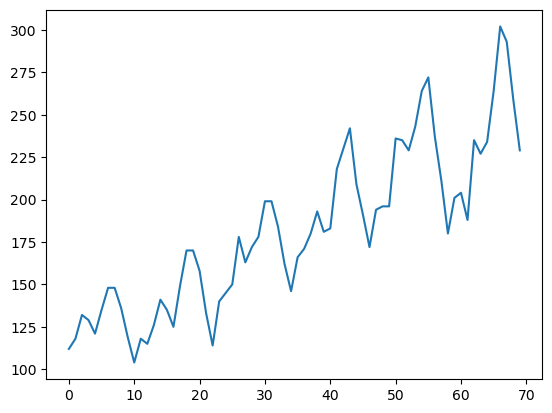

In [33]:
plt.plot(Train.index, Train["Passengers"], label='Train')

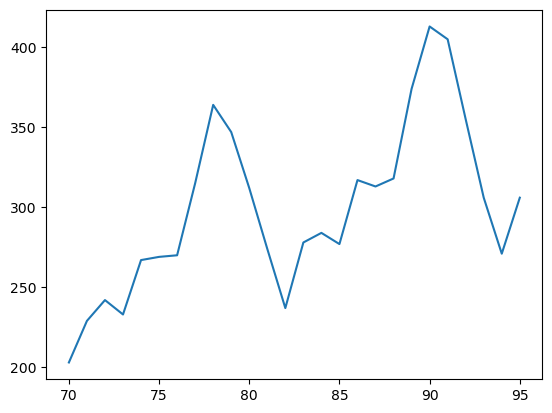

In [34]:
plt.plot(Test.index, Test["Passengers"], label='Test')

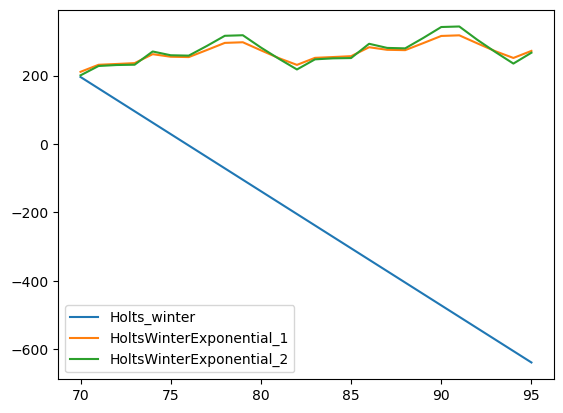

In [35]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

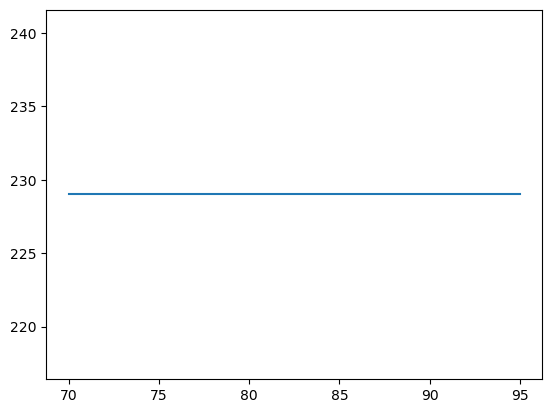

In [36]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential')

# Model based methods

In [37]:
air['Month'] = pd.to_datetime(air['Month'],infer_datetime_format = True)
indexedDataset = air.set_index(['Month'])
air.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [38]:
air["Date"] = pd.to_datetime(air["Month"],format="%b-%y")
air


,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [39]:
air["month"] = air.Date.dt.strftime("%b") 
air["year"]  = air.Date.dt.strftime("%Y") 
air

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [40]:
t= np.arange(1,97)
air['t']=t
air['t_square']=air['t']*air['t']
log_Passengers=np.log(air['Passengers'])
air['log_Passengers']=log_Passengers

In [41]:
air = pd.get_dummies(air,columns=['month'])
air

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building [training and testing]

In [42]:
Train1 = air.head(70)
Test1 = air.tail(26)

# Linear model.

In [43]:
linear= smf.ols('Passengers~t',data=Train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test1['t'])))
rmselin=np.sqrt((np.mean(np.array(Test1['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211886

# Quadratic model.

In [44]:
quad=smf.ols('Passengers~t+t_square',data=Train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test1[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742656

# Expotential model.

In [45]:
expo=smf.ols('log_Passengers~t',data=Train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test1['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

# Additive seasonality

In [46]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
predadd = pd.Series(additive.predict(Test1[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828821

# Additive seasonality with linear trend.

In [47]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
predaddlinear = pd.Series(addlinear.predict(Test1[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.5020897942713

# Additive seasonality with quadratic trend

In [48]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
predaddquad = pd.Series(addquad.predict(Test1[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895923845

# Multiplicative seasonality.

In [49]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
predmul = pd.Series(mulsea.predict(Test1[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

# Multiplicative seasonality with linear trend.


In [50]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
predmullin = pd.Series(mullin.predict(Test1[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(predmullin))**2))
rmsemul


298.6798189957354

# Multiplicative seasonality with quadratic trend.

In [51]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train1).fit()
pred_mul_quad = pd.Series(mul_quad.predict(Test1[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895923845

# Compare RMSE Value.

In [52]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse

,Model,Values
0,rmse_mul_quad,30.393043
1,rmseadd,124.975700
2,rmseaddlinear,34.502090
3,rmseaddquad,30.393043
4,rmseexpo,43.478471
5,rmselin,17.681880
6,rmsemul,298.679819
7,rmsemulin,298.136614
8,rmsequad,43.898145


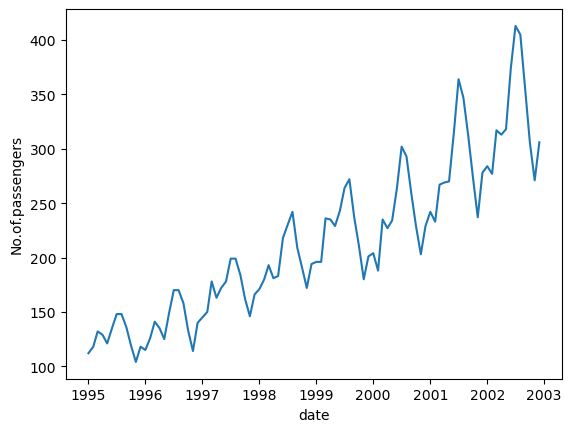

In [53]:
plt.xlabel("date")
plt.ylabel("No.of.passengers")
plt.plot(indexedDataset)